In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('DCOILWTICO.csv')

In [6]:
data.head()

,DATE,DCOILWTICO
0,2023-09-11,87.3
1,2023-09-12,88.87
2,2023-09-13,88.59
3,2023-09-14,90.13
4,2023-09-15,90.83


In [15]:
data.tail()

,DATE,DCOILWTICO,Daily_Return
256,2024-09-03,71.28,-0.043478
257,2024-09-04,70.11,-0.016414
258,2024-09-05,70.09,-0.000285
259,2024-09-06,68.58,-0.021544
260,2024-09-09,69.65,0.015602


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        261 non-null    object
 1   DCOILWTICO  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


C:\Users\SaiCharan Ritwik\Downloads\ANACONDA\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='DCOILWTICO', ylabel='Density'>

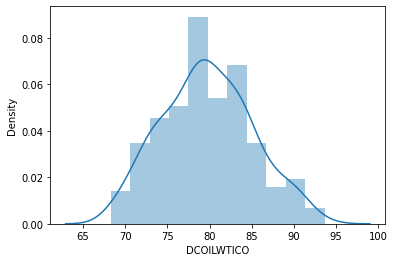

In [31]:
sns.distplot(data['DCOILWTICO'])

#### The  data type of DCOILWTICO is object. We need to change it to numeric.

In [8]:
data['DCOILWTICO'] = pd.to_numeric(data['DCOILWTICO'], errors='coerce')

#### Drop rows with missing values.

In [9]:
data = data.dropna()

In [10]:
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.sort_values('DATE')

#### Calculating the daily returns.

In [11]:
data['Daily_Return'] = data['DCOILWTICO'].pct_change()

In [12]:
data = data.dropna()

#### Statistics of daily return.

In [25]:
mean_return = data['Daily_Return'].mean()
mean_return

-0.0007311294804876082

In [26]:
std_return = data['Daily_Return'].std()
std_return

0.018948701039002928

### Simulation.

In [18]:
current_price = data['DCOILWTICO'].iloc[-1]    # The latest price of crude oil.
trading_days = 18
simulations = 1000                           # Number of Monte Carlo simulations.

In [20]:
np.random.seed(42)
simulated_prices = np.zeros((simulations, trading_days))

In [21]:
simulated_prices

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
for i in range(simulations):
    daily_returns = np.random.normal(mean_return, std_return, trading_days)
    price_path = current_price * np.exp(np.cumsum(daily_returns))
    simulated_prices[i, :] = price_path

In [28]:
final_prices = simulated_prices[:, -1]

In [29]:
mean_predicted_price = np.mean(final_prices)
median_predicted_price = np.median(final_prices)
lower_bound = np.percentile(final_prices, 5)
upper_bound = np.percentile(final_prices, 95)

mean_predicted_price, median_predicted_price, lower_bound, upper_bound

(69.06604277645224, 68.8058847424834, 60.614423903201896, 78.65963446805146)